In [4]:
import aprofiles as apro
import numpy as np
import matplotlib.pyplot as plt

path = "data/e-profile/2021/09/09/L2_0-20000-001492_A20210909.nc"
apro_reader = apro.reader.ReadProfiles(path)
profiles = apro_reader.read()

profiles.range_correction(inplace=True)
profiles.gaussian_filter(var='attenuated_backscatter_0', sigma=0.2, inplace=True)

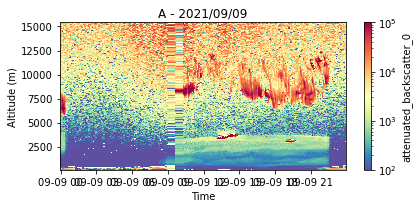

In [3]:
profiles.extrapolation_lowest_layers(var='attenuated_backscatter_0', zmin=2000, method='cst').quickplot(vmin=1e2,vmax=1e5,log=True)

In [9]:
profiles.data.attenuated_backscatter_0.attrs

OrderedDict([('long_name', 'Attenuated Backscatter at wavelength 0'),
             ('units', '1E-6*1/(m*sr)'),
             ('range correction', True),
             ('extrapolation_low_layers_altitude_agl', 1000),
             ('extrapolation_low_layers_method', 'cst')])

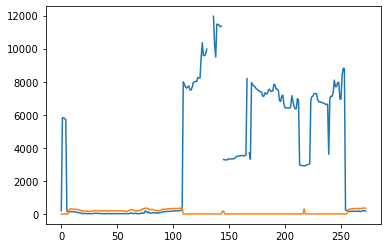

In [33]:
#condensation: use first layer of cloud_base_height
plt.plot(profiles.data.cloud_base_height.data[:,0])
plt.plot(profiles.data.vertical_visibility.data)

In [3]:
profiles.data

<xarray.Dataset>
Dimensions:                          (altitude: 511, layer: 3, time: 273)
Coordinates:
  * time                             (time) datetime64[ns] 2021-09-09T00:00:04 ... 2021-09-09T23:55:06
  * altitude                         (altitude) float64 111.0 ... 1.541e+04
Dimensions without coordinates: layer
Data variables:
    start_time                       (time) datetime64[ns] ...
    latitude                         (time, altitude) float64 ...
    longitude                        (time, altitude) float64 ...
    attenuated_backscatter_0         (time, altitude) float64 17.34 ... -719.1
    uncertainties_att_backscatter_0  (time, altitude) float64 ...
    l0_wavelength                    float64 ...
    station_longitude                float64 ...
    station_latitude                 float64 ...
    station_altitude                 float64 96.0
    quality_flag                     (time, altitude) int64 ...
    vertical_visibility              (time) float64 ...
    cl